# matching을 통해 causal effect 구하기

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./data/ml_earnings.csv')

In [4]:
data.shape

(200, 3)

In [5]:
data.head(3)

,age,took_a_course,earnings
0,19,False,110579.0
1,28,False,142577.0
2,22,True,130520.0


## 01. graph로 나타내기

In [6]:
nodes = ['took_a_course', 'earnings', 'age']
edges = [
    ('took_a_course', 'earnings'),
    ('age', 'took_a_course'),
    ('age', 'earnings')
]

# Generate the GML graph
gml_string = 'graph [directed 1\n'

for node in nodes:
    gml_string += f'\tnode [id "{node}" label "{node}"]\n'

for edge in edges:
    gml_string += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'
    
gml_string += ']'

print(gml_string)

graph [directed 1
	node [id "took_a_course" label "took_a_course"]
	node [id "earnings" label "earnings"]
	node [id "age" label "age"]
	edge [source "took_a_course" target "earnings"]
	edge [source "age" target "took_a_course"]
	edge [source "age" target "earnings"]
]


In [7]:
from dowhy import CausalModel

In [8]:
model = CausalModel(
    data=data,
    treatment='took_a_course',
    outcome='earnings',
    graph=gml_string
)

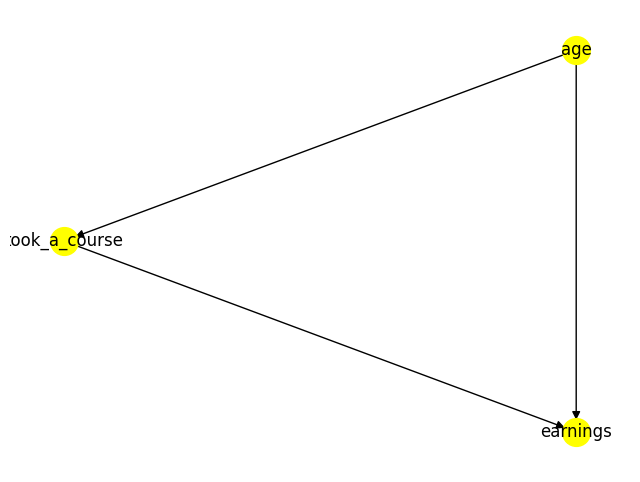

In [9]:
model.view_model('matching')

## 02. estimand 구하기

In [10]:
estimand = model.identify_effect()

print(estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                         
────────────────(E[earnings|age])
d[took_a_course]                 
Estimand assumption 1, Unconfoundedness: If U→{took_a_course} and U→earnings then P(earnings|took_a_course,age,U) = P(earnings|took_a_course,age)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## 03. Estimate

In [11]:
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.distance_matching',
    target_units='ate',
    method_params={'distnace_metric': 'minkowski', 'p':2}
)

In [15]:
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                         
────────────────(E[earnings|age])
d[took_a_course]                 
Estimand assumption 1, Unconfoundedness: If U→{took_a_course} and U→earnings then P(earnings|took_a_course,age,U) = P(earnings|took_a_course,age)

## Realized estimand
b: earnings~took_a_course+age
Target units: ate

## Estimate
Mean value: 10333.75



In [13]:
print(f'matching을 통해 구한 causal effect는 {estimate.value}입니다.')

matching을 통해 구한 causal effect는 10333.75입니다.


## 04. refute